# Chapter 15: One Factor Models

Load the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats

# Coagulation example

In [2]:
coagulation = pd.read_csv("data/coagulation.csv", index_col=0)
coagulation.head()

,coag,diet
1,62,A
2,60,A
3,63,A
4,59,A
5,63,B


`pandas` version of boxplot

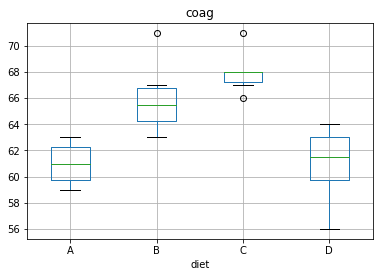

In [3]:
coagulation.boxplot('coag',by='diet')
plt.suptitle("")
plt.show()

`seaborn` version of boxplot

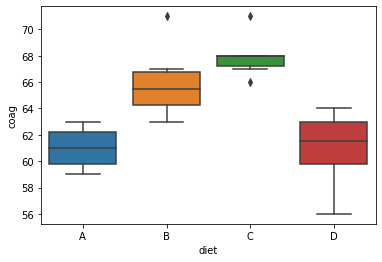

In [4]:
sns.boxplot(x="diet", y="coag", data=coagulation)
plt.show()

Maybe seaborn plot is preferable (although without the colors). Pandas version is annoying over the title and failure to label the y-axis.

`swarmplot` is good when there are replicated points:

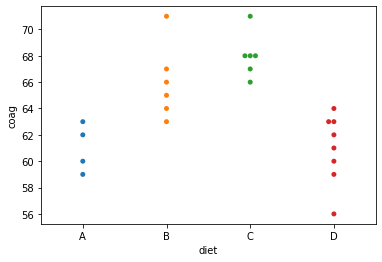

In [5]:
sns.swarmplot(x="diet", y="coag", data=coagulation)
plt.show()

Fit the model:

In [6]:
lmod = smf.ols("coag ~ diet", coagulation).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coag   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           4.66e-05
Time:                        17:13:01   Log-Likelihood:                -52.540
No. Observations:                  24   AIC:                             113.1
Df Residuals:                      20   BIC:                             117.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.0000      1.183     51.554      0.000      58.532      63.468
diet[T.B]      5.0000      1.528      3.273      0.004       1.814       8.186
diet[T.C]      7.0000      1.528      4.583      0.000       3.814      10.186
diet[T.D]  -1.776e-14      1.449  -1.23e-14      1.000      -3.023       3.023
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.029
Skew:                           0.074   Prob(JB):                        0.985
Kurtosis:                       3.084   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Examine the coefficients:

In [7]:
lmod.params.round(1)

Intercept    61.0
diet[T.B]     5.0
diet[T.C]     7.0
diet[T.D]    -0.0
dtype: float64

Look at the design matrix:

In [8]:
import patsy
patsy.dmatrix('~ diet', coagulation)

DesignMatrix with shape (24, 4)
  Intercept  diet[T.B]  diet[T.C]  diet[T.D]
          1          0          0          0
          1          0          0          0
          1          0          0          0
          1          0          0          0
          1          1          0          0
          1          1          0          0
          1          1          0          0
          1          1          0          0
          1          1          0          0
          1          1          0          0
          1          0          1          0
          1          0          1          0
          1          0          1          0
          1          0          1          0
          1          0          1          0
          1          0          1          0
          1          0          0          1
          1          0          0          1
          1          0          0          1
          1          0          0          1
          1          0 

Test the significance of diet.

In [9]:
sm.stats.anova_lm(lmod)

,df,sum_sq,mean_sq,F,PR(>F)
diet,3.0,228.0,76.0,13.571429,0.000047
Residual,20.0,112.0,5.6,NaN,NaN


Fit without an intercept term:

In [10]:
lmodi = smf.ols("coag ~ diet-1", coagulation).fit()
lmodi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coag   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           4.66e-05
Time:                        17:13:02   Log-Likelihood:                -52.540
No. Observations:                  24   AIC:                             113.1
Df Residuals:                      20   BIC:                             117.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
diet[A]       61.0000      1.183     51.554      0.000      58.532      63.468
diet[B]       66.0000      0.966     68.316      0.000      63.985      68.015
diet[C]       68.0000      0.966     70.387      0.000      65.985      70.015
diet[D]       61.0000      0.837     72.909      0.000      59.255      62.745
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.029
Skew:                           0.074   Prob(JB):                        0.985
Kurtosis:                       3.084   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do the ANOVA explicitly:

In [11]:
%%capture --no-display
lmodnull = smf.ols("coag ~ 1", coagulation).fit()
sm.stats.anova_lm(lmodnull, lmod)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,23.0,340.0,0.0,NaN,NaN,NaN
1,20.0,112.0,3.0,228.0,13.571429,0.000047


Do it with sum contrasts:

In [12]:
from patsy.contrasts import Sum
lmods = smf.ols("coag ~ C(diet,Sum)", coagulation).fit()
lmods.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coag   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           4.66e-05
Time:                        17:13:02   Log-Likelihood:                -52.540
No. Observations:                  24   AIC:                             113.1
Df Residuals:                      20   BIC:                             117.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            64.0000      0.498    128.537      0.000      62.961      65.039
C(diet, Sum)[S.A]    -3.0000      0.974     -3.081      0.006      -5.031      -0.969
C(diet, Sum)[S.B]     2.0000      0.845      2.366      0.028       0.237       3.763
C(diet, Sum)[S.C]     4.0000      0.845      4.732      0.000       2.237       5.763
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.029
Skew:                           0.074   Prob(JB):                        0.985
Kurtosis:                       3.084   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Diagnostics

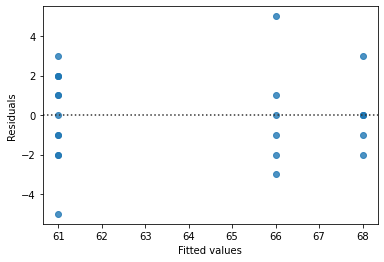

In [13]:
sns.residplot(lmod.fittedvalues, lmod.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

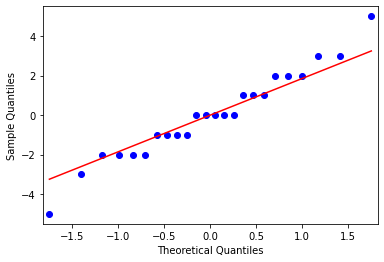

In [14]:
fig = sm.qqplot(lmod.resid, line="q")
plt.show()

Do the Levene test:

In [15]:
coagulation['meds'] = coagulation.groupby('diet').transform(np.median)
coagulation['mads'] = abs(coagulation.coag - coagulation.meds)
coagulation.head()

,coag,diet,meds,mads
1,62,A,61.0,1.0
2,60,A,61.0,1.0
3,63,A,61.0,2.0
4,59,A,61.0,2.0
5,63,B,65.5,2.5


In [16]:
lmodb = smf.ols('mads ~ diet', coagulation).fit()
sm.stats.anova_lm(lmodb)

,df,sum_sq,mean_sq,F,PR(>F)
diet,3.0,4.333333,1.444444,0.649189,0.592646
Residual,20.0,44.500000,2.225000,NaN,NaN


In [17]:
coagulation.coag[coagulation.diet == "A"]

1    62
2    60
3    63
4    59
Name: coag, dtype: int64

Do the Bartlett test:

In [18]:
stats.bartlett(coagulation.coag[coagulation.diet == "A"],
               coagulation.coag[coagulation.diet == "B"],
               coagulation.coag[coagulation.diet == "C"],
               coagulation.coag[coagulation.diet == "D"])

BartlettResult(statistic=1.6679561088149575, pvalue=0.6440812243179765)

# Pairwise comparisons

Assemble the pieces necessary for pairwise comparisons:

In [19]:
lmod.bse

Intercept    1.183216
diet[T.B]    1.527525
diet[T.C]    1.527525
diet[T.D]    1.449138
dtype: float64

In [20]:
lmod.params

Intercept    6.100000e+01
diet[T.B]    5.000000e+00
diet[T.C]    7.000000e+00
diet[T.D]   -1.776357e-14
dtype: float64

In [21]:
stats.t.ppf(0.975,20)

2.0859634472658364

In [22]:
lmod.params[1] + np.array([-1, 1]) * stats.t.ppf(0.975,20) * lmod.bse[1]

array([1.8136382, 8.1863618])

Can do the Tukey pairwise:

In [23]:
thsd = sm.stats.multicomp.pairwise_tukeyhsd(coagulation.coag, coagulation.diet)
thsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,5.0,0.0183,0.7244,9.2756,True
A,C,7.0,0.001,2.7244,11.2756,True
A,D,0.0,0.9,-4.0562,4.0562,False
B,C,2.0,0.4774,-1.8242,5.8242,False
B,D,-5.0,0.0044,-8.5773,-1.4227,True
C,D,-7.0,0.001,-10.5773,-3.4227,True


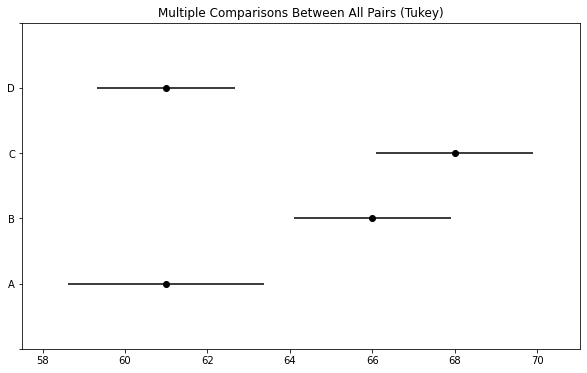

In [24]:
fig = thsd.plot_simultaneous()
plt.show()

## False discovery rate

Read in the data:

In [25]:
jsp = pd.read_csv("data/jsp.csv", index_col=0)
jsp.head()

,school,class,gender,social,raven,id,english,math,year
1,1,1,girl,9,23,1,72,23,0
2,1,1,girl,9,23,1,80,24,1
3,1,1,girl,9,23,1,39,23,2
4,1,1,boy,2,15,2,7,14,0
5,1,1,boy,2,15,2,17,11,1


In [26]:
jsp['mathcent'] = jsp.math - np.mean(jsp.math)

Try two different plotting methods

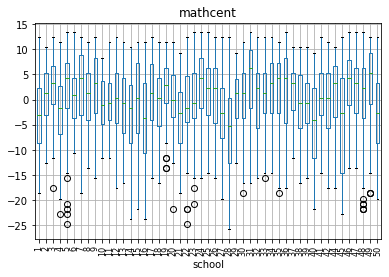

In [27]:
jsp.boxplot('mathcent',by='school')
plt.suptitle("")
plt.xticks(fontsize=8, rotation=90)
plt.show()

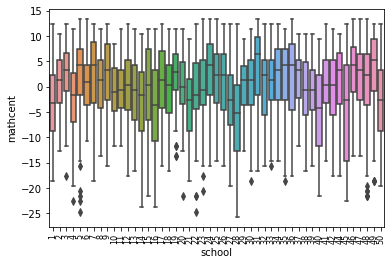

In [28]:
sns.boxplot(x="school", y="mathcent", data=jsp)
plt.xticks(fontsize=8, rotation=90)
plt.show()

In [29]:
lmod = smf.ols("mathcent ~ C(school) - 1", jsp).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mathcent   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.935
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.46e-33
Time:                        17:13:04   Log-Likelihood:                -11032.
No. Observations:                3236   AIC:                         2.216e+04
Df Residuals:                    3187   BIC:                         2.246e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(school)[1]     -3.3685      0.769     -4.383      0.000      -4.875      -1.861
C(school)[2]      0.6714      1.229      0.546      0.585      -1.738       3.081
C(school)[3]      2.2964      1.064      2.158      0.031       0.210       4.383
C(school)[4]     -2.6619      0.869     -3.064      0.002      -4.365      -0.958
C(school)[5]      1.8320      0.809      2.264      0.024       0.245       3.419
C(school)[6]      0.2381      0.952      0.250      0.802      -1.628       2.104
C(school)[7]      1.7227      1.181      1.459      0.145      -0.592       4.037
C(school)[8]      0.5909      0.790      0.748      0.455      -0.959       2.141
C(school)[9]      2.2458      0.914      2.456      0.014       0.453       4.039
C(school)[10]    -1.2453      1.505     -0.827      0.408      -4.196       1.705
C(school)[11]    -0.4619      1.246     -0.371      0.711      -2.905       1.981
C(school)[12]     0.2082      0.840      0.248      0.804      -1.439       1.855
C(school)[13]    -1.6474      0.888     -1.856      0.064      -3.388       0.093
C(school)[14]    -3.2898      1.124     -2.926      0.003      -5.494      -1.086
C(school)[15]    -0.4921      1.013     -0.486      0.627      -2.478       1.493
C(school)[16]    -3.7374      1.013     -3.691      0.000      -5.723      -1.752
C(school)[17]     1.0881      1.648      0.660      0.509      -2.144       4.320
C(school)[18]    -0.8619      0.994     -0.867      0.386      -2.811       1.087
C(school)[19]     1.6108      1.111      1.449      0.147      -0.568       3.790
C(school)[20]    -0.2095      1.138     -0.184      0.854      -2.440       2.021
C(school)[21]    -3.6185      0.769     -4.708      0.000      -5.125      -2.111
C(school)[22]    -1.7271      1.087     -1.589      0.112      -3.858       0.404
C(school)[23]    -0.8171      0.968     -0.844      0.399      -2.715       1.081
C(school)[24]     2.6238      0.929      2.825      0.005       0.803       4.445
C(school)[25]     1.4232      1.075      1.323      0.186      -0.685       3.532
C(school)[26]     0.4919      0.835      0.589      0.556      -1.145       2.129
C(school)[27]    -2.3058      0.863     -2.672      0.008      -3.998      -0.614
C(school)[28]    -5.8286      1.064     -5.478      0.000      -7.915      -3.742
C(school)[29]     0.2090      0.936      0.223      0.823      -1.627       2.045
C(school)[30]     0.2392      0.773      0.309      0.757      -1.276       1.754
C(school)[31]     3.8241      0.713      5.366      0.000       2.427       5.221
C(school)[32]    -0.0268      0.857     -0.031      0.975      -1.707       1.654
C(school)[33]     1.0633      0.644      1.651      0.099      -0.200       2.326
C(school)[34]     1.9359      0.769      2.519      0.012       0.429       3.443
C(school)[35]     1.9041      1.013      1.880   

In [30]:
sm.stats.anova_lm(smf.ols("mathcent ~ C(school)", jsp).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(school),48.0,15483.816175,322.579504,5.935264,1.458040e-33
Residual,3187.0,173212.333393,54.349650,NaN,NaN


In [31]:
lmod.pvalues

C(school)[1]     1.210916e-05
C(school)[2]     5.848061e-01
C(school)[3]     3.099485e-02
C(school)[4]     2.203529e-03
C(school)[5]     2.364073e-02
C(school)[6]     8.024944e-01
C(school)[7]     1.445850e-01
C(school)[8]     4.547159e-01
C(school)[9]     1.410363e-02
C(school)[10]    4.080158e-01
C(school)[11]    7.108935e-01
C(school)[12]    8.042920e-01
C(school)[13]    6.351130e-02
C(school)[14]    3.455110e-03
C(school)[15]    6.270231e-01
C(school)[16]    2.273774e-04
C(school)[17]    5.092721e-01
C(school)[18]    3.859690e-01
C(school)[19]    1.473420e-01
C(school)[20]    8.538620e-01
C(school)[21]    2.610820e-06
C(school)[22]    1.121715e-01
C(school)[23]    3.986798e-01
C(school)[24]    4.759221e-03
C(school)[25]    1.857784e-01
C(school)[26]    5.556972e-01
C(school)[27]    7.572699e-03
C(school)[28]    4.647573e-08
C(school)[29]    8.233416e-01
C(school)[30]    7.569780e-01
C(school)[31]    8.645474e-08
C(school)[32]    9.750611e-01
C(school)[33]    9.889090e-02
C(school)[

In [32]:
from statsmodels.sandbox.stats.multicomp import multipletests
reject, padj, _, _ = multipletests(lmod.pvalues, method="bonferroni")

These schools are rejected by Bonferroni.

In [33]:
lmod.params[reject]

C(school)[1]    -3.368450
C(school)[16]   -3.737400
C(school)[21]   -3.618450
C(school)[28]   -5.828595
C(school)[31]    3.824053
C(school)[40]   -4.985458
C(school)[45]   -4.639201
C(school)[50]   -2.652027
dtype: float64

In [34]:
selsch = np.argsort(lmod.pvalues)[np.sort(lmod.pvalues) < np.arange(1,50)*0.05/49]
lmod.params.index[selsch]

Index(['C(school)[28]', 'C(school)[31]', 'C(school)[21]', 'C(school)[1]',
       'C(school)[45]', 'C(school)[40]', 'C(school)[16]', 'C(school)[50]',
       'C(school)[47]', 'C(school)[49]', 'C(school)[4]', 'C(school)[36]',
       'C(school)[46]', 'C(school)[14]', 'C(school)[24]', 'C(school)[27]',
       'C(school)[34]', 'C(school)[9]'],
      dtype='object')

Schools identified using false discovery rate.

In [35]:
reject, padj, _, _ = multipletests(lmod.pvalues, method="fdr_bh")
lmod.params[reject]

C(school)[1]    -3.368450
C(school)[4]    -2.661928
C(school)[9]     2.245764
C(school)[14]   -3.289835
C(school)[16]   -3.737400
C(school)[21]   -3.618450
C(school)[24]    2.623786
C(school)[27]   -2.305764
C(school)[28]   -5.828595
C(school)[31]    3.824053
C(school)[34]    1.935898
C(school)[36]    2.360544
C(school)[40]   -4.985458
C(school)[45]   -4.639201
C(school)[46]    3.063562
C(school)[47]    2.396895
C(school)[49]    2.796405
C(school)[50]   -2.652027
dtype: float64